##0.Librerías necesarias

In [12]:
#!pip install rarfile
#!pip install unzip
!pip install stop-words
!pip install num2words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
#Librerias necesarias
import numpy as np
import pandas as pd
from google.colab import drive
import random
#import rarfile # para descomprimir archivos
import json
#import csv 
#para limpiar los datos
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
nltk.download('omw-1.4')
import string
import unicodedata
from num2words import num2words
#para reducir la dimensión
from sklearn.manifold import TSNE
#para representar
import matplotlib.pyplot as plt

#análisis exloratorio
from collections import Counter
from nltk import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud

#preprocesado
from stop_words import get_stop_words
import unicodedata
import re

#modelado
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

#reporte
from sklearn.metrics import classification_report, accuracy_score, roc_curve, precision_recall_curve


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##1. Carga de datos

In [16]:
# Montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#cargamos los datos necesarios desde nuestro google drive
path = '/content/drive/MyDrive/NLP/'

train_clean = pd.read_csv(f'{path}train_clean.csv')
test_clean= pd.read_csv(f'{path}test_clean.csv')

In [18]:
train_clean

,review_clean,sentiment_label
0,pie arrived wa missing one ordered topping pay...,1
1,burger wa fabulous bacon tasted like one green...,0
2,food wa good chicken spam meat,1
3,solid taco place tortilla bit soft,1
4,mahi mahi taco pretty good landlocked tucson c...,1
...,...,...
4760,ok burger price fry usually dont like kind dry...,1
4761,ordered cheesy todd cheeseburger ha bacon jala...,1
4762,coffee surprisingly good omeletes well made an...,1
4763,secret theyve got best burger around,0


In [19]:
test_clean

,review_clean,sentiment_label
0,next time want order bibim naengmyeon dumpling...,0
1,love place exelent steak chumichurri steak per...,0
2,server suggested salt vinegar seasoning tater ...,1
3,green bean shriveled quite honestly worst gree...,1
4,one put sign saying chicken fried nationwell k...,1
...,...,...
1584,love seafood place sits right water front lot ...,0
1585,starter fritto miso fried calamari zucchini sh...,0
1586,aw ha always smooth root beer forgotten sweet ...,0
1587,tilapia crispy taste okay onion ring little bl...,1


##2. Split de los datos

In [117]:
#dividimos con las columnas 'processedReview' y las etiquetas 'sentiment_label'

#split conjunto de train
X_train = train_clean['review_clean']
y_train = train_clean['sentiment_label']

#split conjunto de test
X_test = test_clean['review_clean']
y_test = test_clean['sentiment_label']


In [118]:
X_train.iloc[:10]

0    pie arrived wa missing one ordered topping pay...
1    burger wa fabulous bacon tasted like one green...
2                       food wa good chicken spam meat
3                   solid taco place tortilla bit soft
4    mahi mahi taco pretty good landlocked tucson c...
5    photograph speak volume taste delivered smoke ...
6          fry die fried cod sandwich wa best ive ever
7     crab soup delicious sandwich poboys taco awesome
8    people working need smile music yes place need...
9    ive tried variety sushi roll good yama salad w...
Name: review_clean, dtype: object

In [119]:
y_train.iloc[:10]

0    1
1    0
2    1
3    1
4    1
5    0
6    0
7    0
8    1
9    0
Name: sentiment_label, dtype: int64

##3. Extracción de características

In [120]:
# CountVectorizer
cv = CountVectorizer(ngram_range=(1, 2), max_features=1000, max_df=0.95, min_df=5)
X_train_cv = cv.fit_transform(train_clean['review_clean']).toarray() #.toarray() para plotearlo
X_test_cv = cv.transform(test_clean['review_clean']).toarray()

# TfIdfVectorizer 
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, max_df=0.95, min_df=5)
X_train_tfidf = tfidf.fit_transform(train_clean['review_clean'])
X_test_tfidf = tfidf.transform(test_clean['review_clean'])

In [121]:
print(list(tfidf.vocabulary_.items())[:20])

[('pie', 650), ('arrived', 32), ('wa', 919), ('missing', 550), ('one', 596), ('ordered', 605), ('topping', 887), ('pay', 628), ('prefer', 675), ('burger', 117), ('bacon', 49), ('tasted', 853), ('like', 484), ('green', 388), ('street', 833), ('meat', 530), ('house', 426), ('burger wa', 119), ('tasted like', 854), ('food', 339)]


In [122]:
print(len(tfidf.vocabulary_))

1000


##3.1 Frecuencia de las palabras

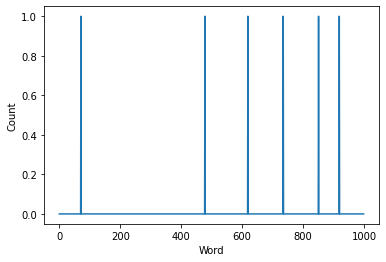

In [142]:
#Frecuencia de las palabras
plt.plot(X_train_cv[5,:]) #CountVectorized train en array
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

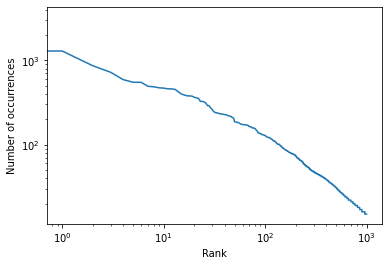

In [139]:

#Observamos la ley de Zipf
word_freq = X_train_cv.sum(axis=0)

sorted_word_freq = np.sort(word_freq)[::-1]

plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

###3.2 Score IDF de algunas palabras

In [123]:
words_example = [
    'sauce',
    'very',
    'good',
    'amazing',
    'great',
    'fresh',
    'fish',
    'deviled',
    'but',
    'was',
    'never',
    'not',
    'wasn´t'
]

In [124]:
vocab_idf = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

print('{0:20}{1:20}'.format('Palabra', 'IDF'))
for word in words_example:
    if word not in vocab_idf:
        print('{0:20}{1:20}'.format(word, 'OOV'))
    else:
        print('{0:20}{1:2.3f}'.format(word, vocab_idf[word]))

Palabra             IDF                 
sauce               3.679
very                OOV                 
good                2.489
amazing             3.897
great               3.255
fresh               3.831
fish                4.080
deviled             OOV                 
but                 OOV                 
was                 OOV                 
never               5.619
not                 OOV                 
wasn´t              OOV                 


###3.3 Palabras con el TF-IDF en alguna review

In [125]:
i = random.randint(0, len(X_train))
print('ID: {}'.format(i))
print('Sentiment: {}'.format(y_train.iloc[i]))
print('Review: {}'.format(X_train.iloc[i]))

ID: 2178
Sentiment: 1
Review: thought fried chicken wa cheap pie first time realized wasnt also size sushi small doesnt match price


In [140]:
doc_vector = X_train_tfidf[i]
df_tfidf = pd.DataFrame(doc_vector.T.todense(), index=tfidf.get_feature_names_out(), columns=['tfidf'])
df_tfidf = df_tfidf[df_tfidf['tfidf'] > 0]

top_n = 10
print('Top {} words with highest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[:top_n]))
print('\nTop {} words with lowest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[-top_n:]))

Top 10 words with highest TF_IDF in the review 85:
                tfidf
expecting    0.404277
bloody mary  0.387273
lacked       0.387273
mary         0.387273
bloody       0.380252
said         0.329031
wa           0.234855
wa good      0.234140
good         0.154230

Top 10 words with lowest TF_IDF in the review 85:
                tfidf
expecting    0.404277
bloody mary  0.387273
lacked       0.387273
mary         0.387273
bloody       0.380252
said         0.329031
wa           0.234855
wa good      0.234140
good         0.154230


###3.4 Chi2(χ²) scores

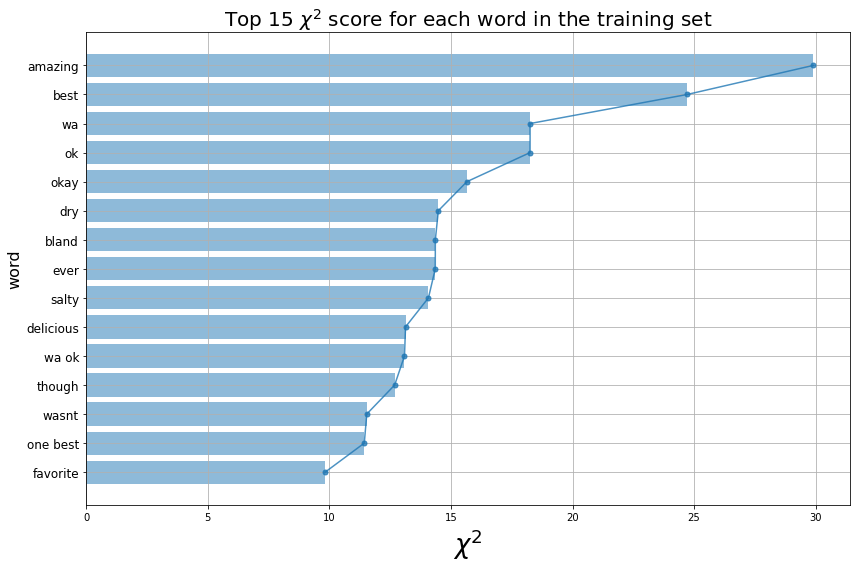

In [127]:
# Compute the chi-squared score for each word in the training set and show the values
i = 15

chi2score = chi2(X_train_tfidf, y_train)[0]
scores = list(zip(cv.get_feature_names_out(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

## 4. Entrenamiento modelo de clasificación binaria 

In [128]:
#al final intentar hacer una gridsearch

In [130]:
#Regresión logística
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000] #lista de parámetros

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=1000)
    lr.fit(X_train_tfidf, y_train)
    
    train_predict = lr.predict(X_train_tfidf)
    test_predict = lr.predict(X_test_tfidf) ####
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.5758338577721838
Accuracy for C=0.05: 0.6368785399622404
Accuracy for C=0.25: 0.6979232221522971
Accuracy for C=0.5: 0.7086217747010699
Accuracy for C=1: 0.7142857142857143
Accuracy for C=10: 0.6922592825676526
Accuracy for C=100: 0.685336689741976
Accuracy for C=1000: 0.6752674638137193
Accuracy for C=10000: 0.6765261170547514


In [131]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[385 289]
 [225 690]]

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       674
           1       0.70      0.75      0.73       915

    accuracy                           0.68      1589
   macro avg       0.67      0.66      0.66      1589
weighted avg       0.67      0.68      0.67      1589

Accuracy score:0.6765261170547514


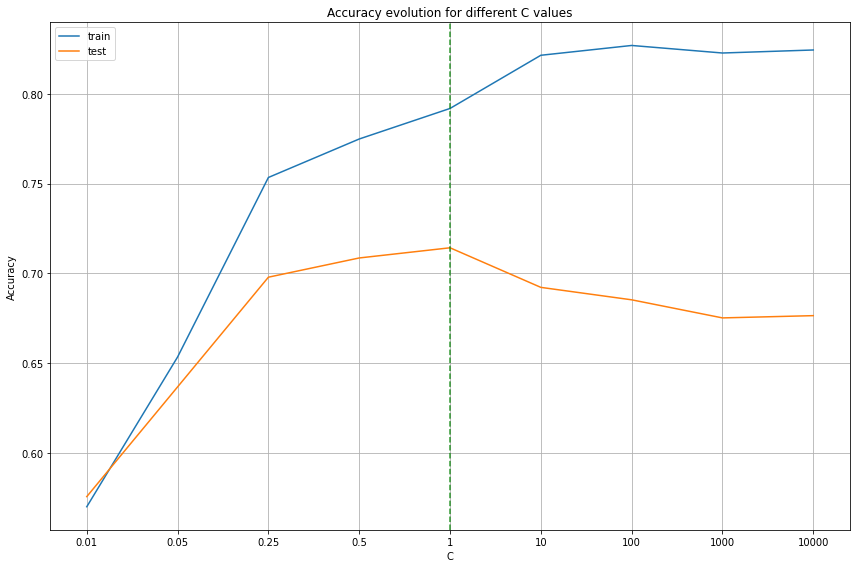

In [132]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [133]:
p, r, thresholds = precision_recall_curve(y_test, test_predict)

In [134]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

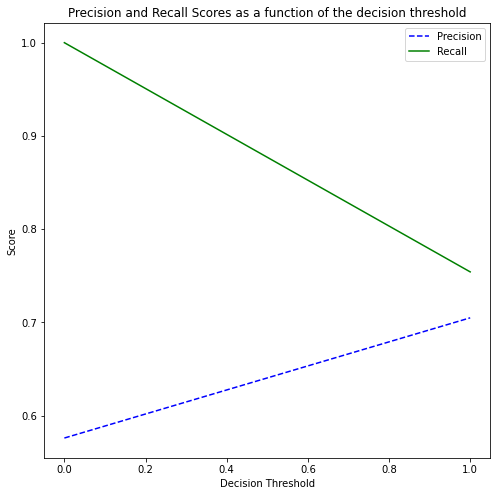

In [135]:
plot_precision_recall_vs_threshold(p, r, thresholds)

##5. Predicción

In [136]:
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(test_clean.iloc[review_index]['sentiment_label']))
    r = test_clean.iloc[review_index]['review_clean']
    print('Prediction: {}'.format(lr.predict(tfidf.transform([r]))))

In [137]:
for i in random.sample(range(0, len(test_clean)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)


Review no. 282
Actual sentiment: 0
Prediction: [0]

Review no. 66
Actual sentiment: 1
Prediction: [1]

Review no. 601
Actual sentiment: 1
Prediction: [1]

Review no. 969
Actual sentiment: 1
Prediction: [1]

Review no. 85
Actual sentiment: 1
Prediction: [1]


#Entrenamiento modelo con árboles de predicción

In [141]:
#xgboost 
from sklearn.ensemble import GradientBoostingClassifier
labels_train= train_clean['sentiment_label']
labels_test= test_clean['sentiment_label']
n_estimators = 32

def classify_gboost(X_train, X_test, y_train, y_test):        
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=42)

    clf.fit(X_train, y_train)
    
    print("[{}] Accuracy: train = {}, test = {}".format(
            clf.__class__.__name__,
            clf.score(X_train, y_train),
            clf.score(X_test, y_test)))
    
    return clf


clf2 = classify_gboost(X_train_tfidf, X_test_tfidf, labels_train, labels_test)

[GradientBoostingClassifier] Accuracy: train = 0.7078698845750262, test = 0.6815607300188798


## Modelado CNN